# Credit Card Eligibility

***
**About the project**

***

*The goal was to create model capable of establishing if client applying for creadit card is credible or not. 
Prediction were based on Default Payments of Credit Card Clients in Taiwan from 2005 dataset.*

***
**About Dataset**

***

**Dataset Information**

*This dataset contains information on default payments, demographic factors, credit data, history of payment, and bill statements of credit card clients in Taiwan from April 2005 to September 2005.*

**There are 25 variables:**

* **ID:** *ID of each client*

* **LIMIT_BAL:** *Amount of given credit in NT dollars (includes individual and family/supplementary credit

* **SEX:** Gender (1=male, 2=female)*

* **EDUCATION:** *(1 = graduate school; 2 = university; 3 = high school; 0, 4, 5, 6 = others)*

* **MARRIAGE:** *Marital status (1 = married; 2 = single; 3 = divorce; 0=others)*

* **AGE:** *Age in years*

* **PAY_0:** *Repayment status in September, 2005 (-2: No consumption; -1: Paid in full; 0: The use of revolving credit; 1 = payment delay for one month; 2 = payment delay for two months; . . .; 8 = payment delay for eight months; 9 = payment delay for nine months and above)*

* **PAY_2:** *Repayment status in August, 2005 (scale same as above)*

* **PAY_3:** *Repayment status in July, 2005 (scale same as above)*

* **PAY_4:** *Repayment status in June, 2005 (scale same as above)*

* **PAY_5:** *Repayment status in May, 2005 (scale same as above)*

* **PAY_6:** *Repayment status in April, 2005 (scale same as above)*

* **BILL_AMT1:** *Amount of bill statement in September, 2005 (NT dollar)*

* **BILL_AMT2:** *Amount of bill statement in August, 2005 (NT dollar)*

* **BILL_AMT3:** *Amount of bill statement in July, 2005 (NT dollar)*

* **BILL_AMT4:** *Amount of bill statement in June, 2005 (NT dollar)*

* **BILL_AMT5:** *Amount of bill statement in May, 2005 (NT dollar)*

* **BILL_AMT6:** *Amount of bill statement in April, 2005 (NT dollar)*

* **PAY_AMT1:** *Amount of previous payment in September, 2005 (NT dollar)*

* **PAY_AMT2:** *Amount of previous payment in August, 2005 (NT dollar)*

* **PAY_AMT3:** *Amount of previous payment in July, 2005 (NT dollar)*

* **PAY_AMT4:** *Amount of previous payment in June, 2005 (NT dollar)*

* **PAY_AMT5:** *Amount of previous payment in May, 2005 (NT dollar)*

* **PAY_AMT6:** *Amount of previous payment in April, 2005 (NT dollar)*

* **default.payment.next.month:** *Default payment (1=yes, 0=no)*


***

**Acknowledgements**

*Lichman, M. (2013). UCI Machine Learning Repository [http://archive.ics.uci.edu/ml]. Irvine, CA: University of California, School of Information and Computer Science.*
***

# Imports

In [1]:
# data operations
import pandas as pd
import numpy as np

# data visualisation
import matplotlib.pyplot as plt
import seaborn as sns

# data preparation
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.feature_selection import RFE

# models 
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.model_selection import GridSearchCV

# models evaluation
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score, recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import classification_report
from scipy import stats
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import precision_recall_curve

import warnings as wr
wr.filterwarnings('ignore')

# Data import

In [2]:
credit = pd.read_excel('default_of_credit_card_clients.xls', index_col=0, header=1)

In [3]:
# a quick look at the data structure
credit.head()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
ID,,,,,,,,,,,,,,,,,,,,,
1,20000,2,2,1,24,2,2,-1,-1,-2,...,0,0,0,0,689,0,0,0,0,1
2,120000,2,2,2,26,-1,2,0,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
3,90000,2,2,2,34,0,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
4,50000,2,2,1,37,0,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
5,50000,1,2,1,57,-1,0,-1,0,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


In [4]:
# data info
credit.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30000 entries, 1 to 30000
Data columns (total 24 columns):
 #   Column                      Non-Null Count  Dtype
---  ------                      --------------  -----
 0   LIMIT_BAL                   30000 non-null  int64
 1   SEX                         30000 non-null  int64
 2   EDUCATION                   30000 non-null  int64
 3   MARRIAGE                    30000 non-null  int64
 4   AGE                         30000 non-null  int64
 5   PAY_0                       30000 non-null  int64
 6   PAY_2                       30000 non-null  int64
 7   PAY_3                       30000 non-null  int64
 8   PAY_4                       30000 non-null  int64
 9   PAY_5                       30000 non-null  int64
 10  PAY_6                       30000 non-null  int64
 11  BILL_AMT1                   30000 non-null  int64
 12  BILL_AMT2                   30000 non-null  int64
 13  BILL_AMT3                   30000 non-null  int64
 14  BILL_A

**All columns hold information in int64 format, but some of the attributes are categorical. Values in categorical attributes need to be checked.**

In [5]:
categorical_attributes = ['SEX','EDUCATION','MARRIAGE','PAY_0','PAY_2','PAY_3','PAY_4','PAY_5','PAY_6','default payment next month']

In [6]:
# checking values in categorical_attributes
for col in credit[categorical_attributes]:
    print('\n',col)
    print(credit[col].value_counts())
    print('----------------------')


 SEX
2    18112
1    11888
Name: SEX, dtype: int64
----------------------

 EDUCATION
2    14030
1    10585
3     4917
5      280
4      123
6       51
0       14
Name: EDUCATION, dtype: int64
----------------------

 MARRIAGE
2    15964
1    13659
3      323
0       54
Name: MARRIAGE, dtype: int64
----------------------

 PAY_0
 0    14737
-1     5686
 1     3688
-2     2759
 2     2667
 3      322
 4       76
 5       26
 8       19
 6       11
 7        9
Name: PAY_0, dtype: int64
----------------------

 PAY_2
 0    15730
-1     6050
 2     3927
-2     3782
 3      326
 4       99
 1       28
 5       25
 7       20
 6       12
 8        1
Name: PAY_2, dtype: int64
----------------------

 PAY_3
 0    15764
-1     5938
-2     4085
 2     3819
 3      240
 4       76
 7       27
 6       23
 5       21
 1        4
 8        3
Name: PAY_3, dtype: int64
----------------------

 PAY_4
 0    16455
-1     5687
-2     4348
 2     3159
 3      180
 4       69
 7       58
 5       35
 6   

**All numbers are valid, but categories `0,5 and 6` in `EDUCATION` column were changed to `4`, and `MARRIAGE` column category `0` to `3`.
`PAY_0 - PAY_6` attributes were transfomed into numeric attributes by assiging `-2` and `-1` values to `0` to get lenght of payment delay in months.**

In [7]:
credit.loc[~credit['EDUCATION'].isin([1, 2, 3]), 'EDUCATION'] = 4
credit.loc[~credit['MARRIAGE'].isin([1, 2]), 'MARRIAGE'] = 3

pay_x = ['PAY_0', 'PAY_2','PAY_3','PAY_4','PAY_5','PAY_6']
for x in pay_x:
    credit.loc[~credit[x].isin([1, 2,3,4,5,6,7,8]), x] = 0

In [8]:
# NaN values check
credit.isnull().sum()

LIMIT_BAL                     0
SEX                           0
EDUCATION                     0
MARRIAGE                      0
AGE                           0
PAY_0                         0
PAY_2                         0
PAY_3                         0
PAY_4                         0
PAY_5                         0
PAY_6                         0
BILL_AMT1                     0
BILL_AMT2                     0
BILL_AMT3                     0
BILL_AMT4                     0
BILL_AMT5                     0
BILL_AMT6                     0
PAY_AMT1                      0
PAY_AMT2                      0
PAY_AMT3                      0
PAY_AMT4                      0
PAY_AMT5                      0
PAY_AMT6                      0
default payment next month    0
dtype: int64

**As seen in the info, there are no missing values.**

In [9]:
# summary of the numeric attributes
credit.drop(['SEX','EDUCATION','MARRIAGE','PAY_0','PAY_2','PAY_3','PAY_4','PAY_5','PAY_6','default payment next month'], axis=1).describe()

,LIMIT_BAL,AGE,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6
count,30000.000000,30000.000000,30000.000000,30000.000000,3.000000e+04,30000.000000,30000.000000,30000.000000,30000.000000,3.000000e+04,30000.00000,30000.000000,30000.000000,30000.000000
mean,167484.322667,35.485500,51223.330900,49179.075167,4.701315e+04,43262.948967,40311.400967,38871.760400,5663.580500,5.921163e+03,5225.68150,4826.076867,4799.387633,5215.502567
std,129747.661567,9.217904,73635.860576,71173.768783,6.934939e+04,64332.856134,60797.155770,59554.107537,16563.280354,2.304087e+04,17606.96147,15666.159744,15278.305679,17777.465775
min,10000.000000,21.000000,-165580.000000,-69777.000000,-1.572640e+05,-170000.000000,-81334.000000,-339603.000000,0.000000,0.000000e+00,0.00000,0.000000,0.000000,0.000000
25%,50000.000000,28.000000,3558.750000,2984.750000,2.666250e+03,2326.750000,1763.000000,1256.000000,1000.000000,8.330000e+02,390.00000,296.000000,252.500000,117.750000
50%,140000.000000,34.000000,22381.500000,21200.000000,2.008850e+04,19052.000000,18104.500000,17071.000000,2100.000000,2.009000e+03,1800.00000,1500.000000,1500.000000,1500.000000
75%,240000.000000,41.000000,67091.000000,64006.250000,6.016475e+04,54506.000000,50190.500000,49198.250000,5006.000000,5.000000e+03,4505.00000,4013.250000,4031.500000,4000.000000
max,1000000.000000,79.000000,964511.000000,983931.000000,1.664089e+06,891586.000000,927171.000000,961664.000000,873552.000000,1.684259e+06,896040.00000,621000.000000,426529.000000,528666.000000


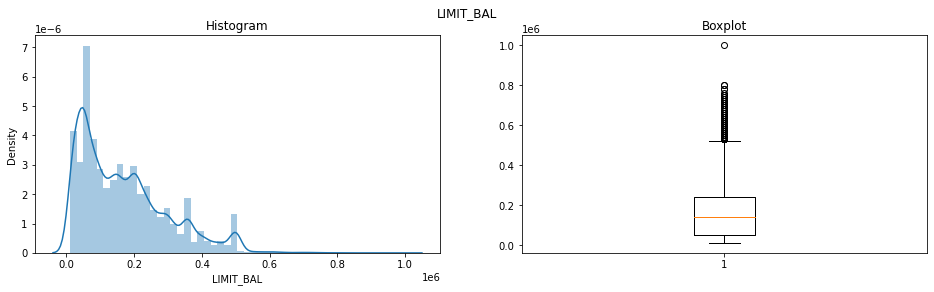

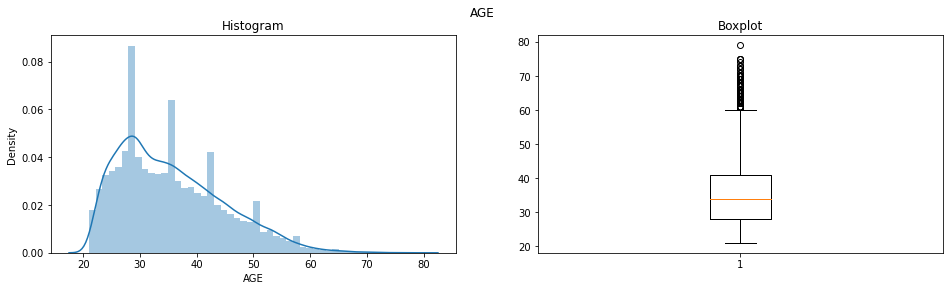

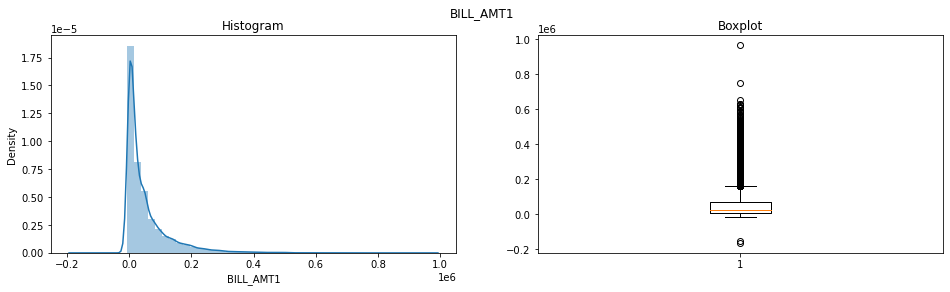

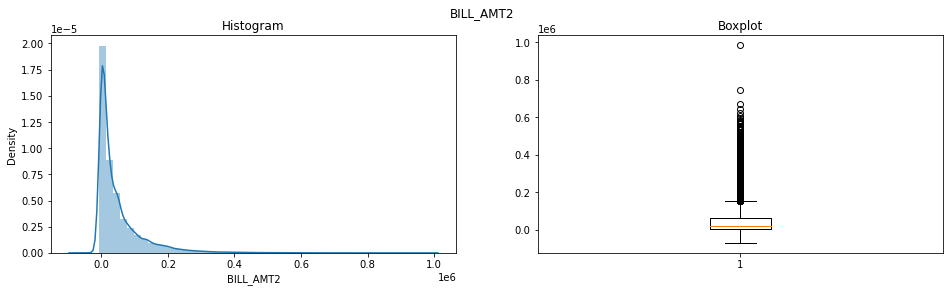

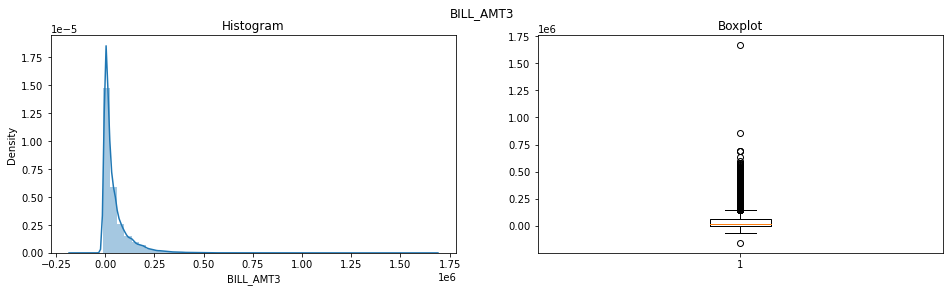

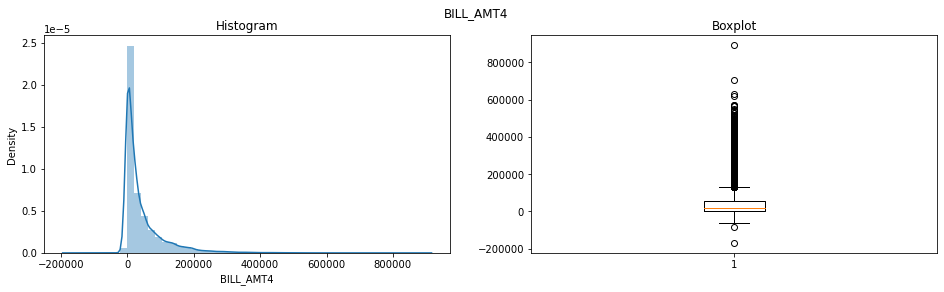

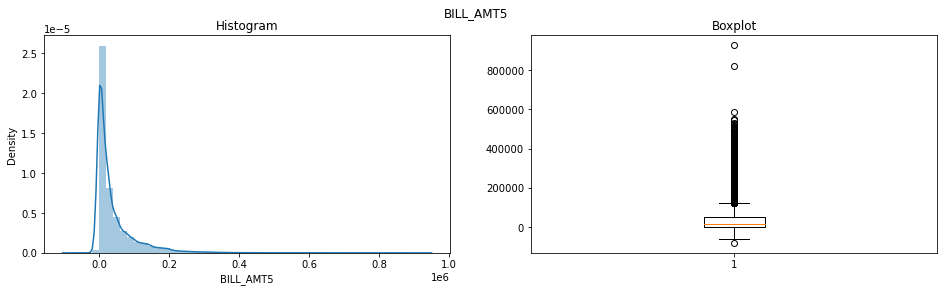

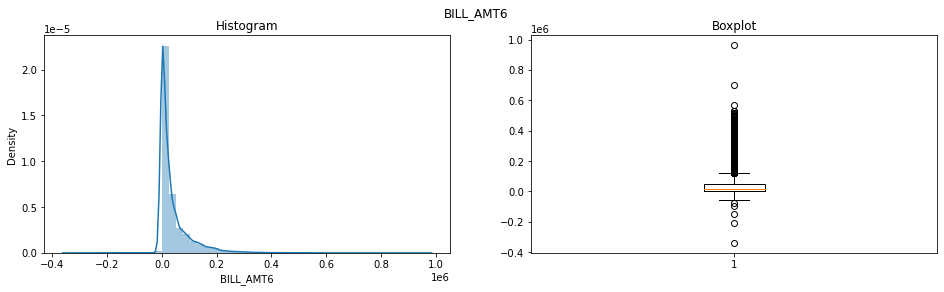

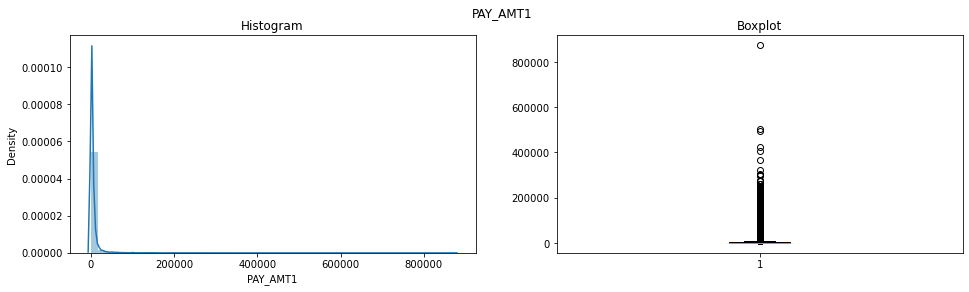

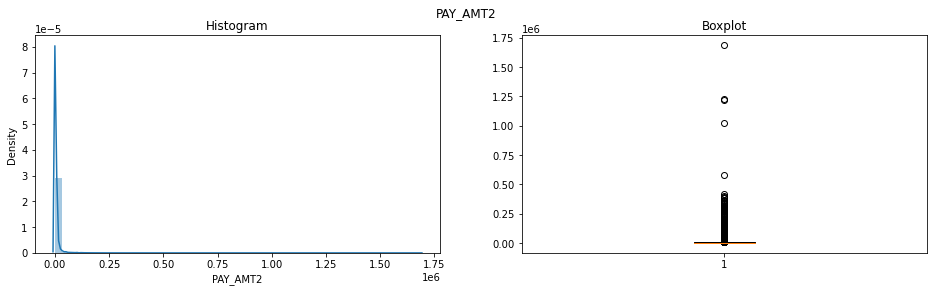

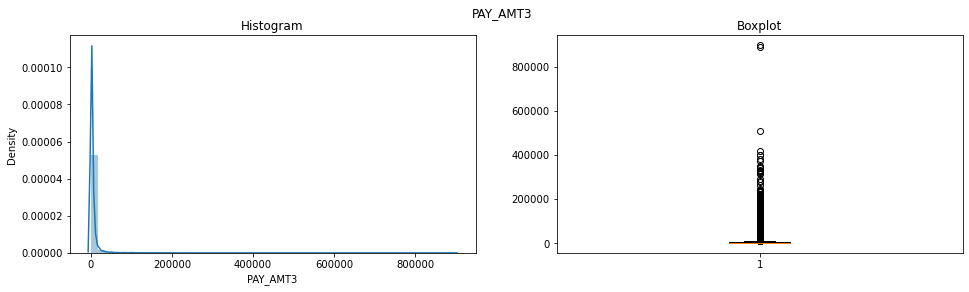

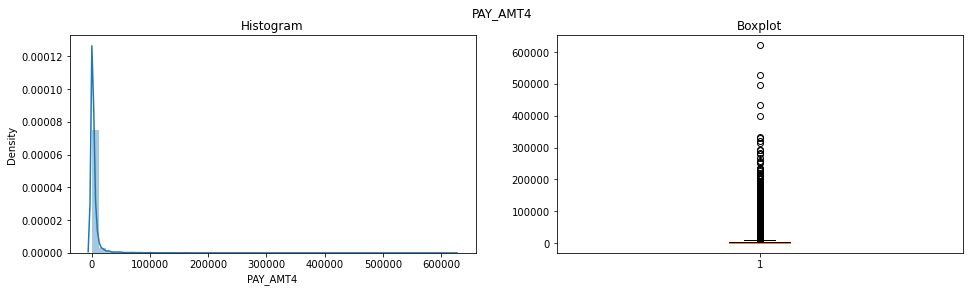

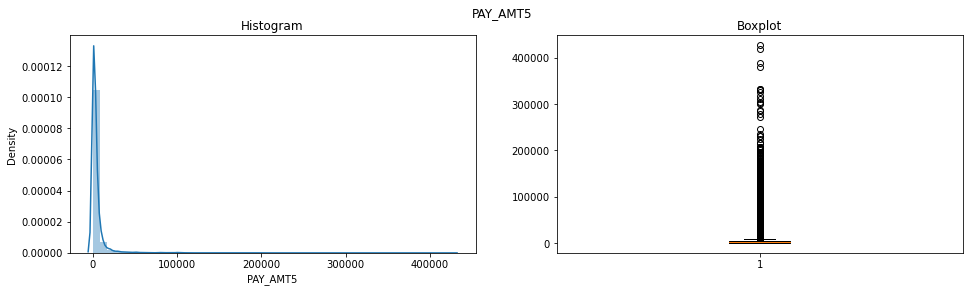

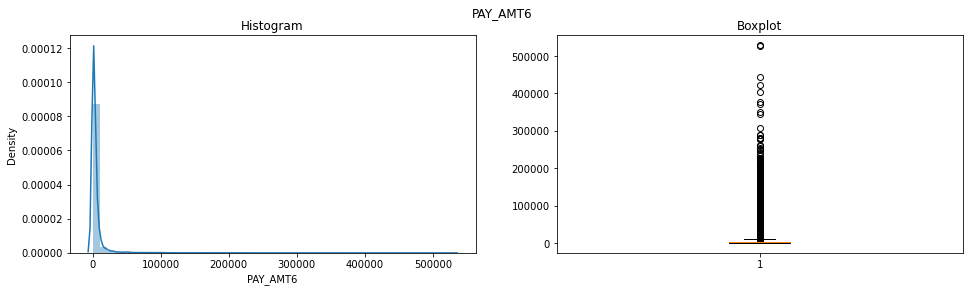

In [10]:
for variable in credit.drop(['SEX','EDUCATION','MARRIAGE','PAY_0','PAY_2','PAY_3','PAY_4','PAY_5','PAY_6','default payment next month'], axis=1):
    fig = plt.figure(figsize=(16, 4))
    fig.suptitle(variable, fontsize=12)
    plt.subplot(121)
    sns.distplot(credit[variable], kde=True, rug=False)
    plt.title('Histogram')
    plt.subplot(122)
    plt.boxplot(credit[variable])
    plt.title('Boxplot')
    plt.show()

**Histograms extend much further to the right of the median, than to the left. There are numerous outliers exceeding maximum in every attribute. Boxplots reveal that features are in different scales and units, therefore before modeling standarization will be perfomed in data preprocessing step.**

**Before futher exploration of data there was created the test set, which wasn't a part of exploratory analysis.
From the buisiness perspective it is important to detect not credible clients especially if they apply for high credit. Therefore `StratifiedShuffleSplit` was used to create train set representative for various credit amounts (and default payment next month status).**

In [11]:
# creating LIMIT_BAL categorical attribute with 5 classes possible
credit['limit_cat'] = pd.cut(credit['LIMIT_BAL'],bins=[0,50000,100000,200000,300000,np.inf],
                        labels=[1,2,3,4,5])

<AxesSubplot:>

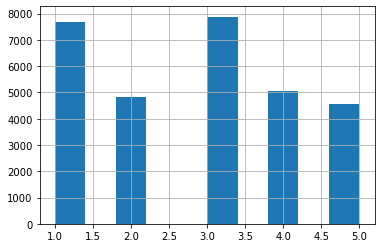

In [12]:
credit['limit_cat'].hist()

In [13]:
# stratified sampling for test and train sets by limit_cat and default payment next month attributes

split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
for train_index, test_index in split.split(credit, credit[['limit_cat','default payment next month']]):
    strat_train_set = credit.iloc[train_index]
    strat_test_set = credit.iloc[test_index]

In [14]:
for set_ in (strat_train_set, strat_test_set):
    set_.drop('limit_cat', axis=1, inplace=True)

# Exploratory Data Analysis

In [15]:
credit = strat_train_set.copy()

In [16]:
debt_by_month=credit[['BILL_AMT6', 'BILL_AMT5','BILL_AMT4', 'BILL_AMT3','BILL_AMT2', 'BILL_AMT1']].sum().to_frame().reset_index().rename(columns={'index':'month',0:'sum'})
debt_by_month.at[0,'month']='April'
debt_by_month.at[1,'month']='May'
debt_by_month.at[2,'month']='June'
debt_by_month.at[3,'month']='July'
debt_by_month.at[4,'month']='August'
debt_by_month.at[5,'month']='September'
debt_by_month

,month,sum
0,April,941165111
1,May,974196016
2,June,1046195755
3,July,1135830382
4,August,1188318782
5,September,1239001205


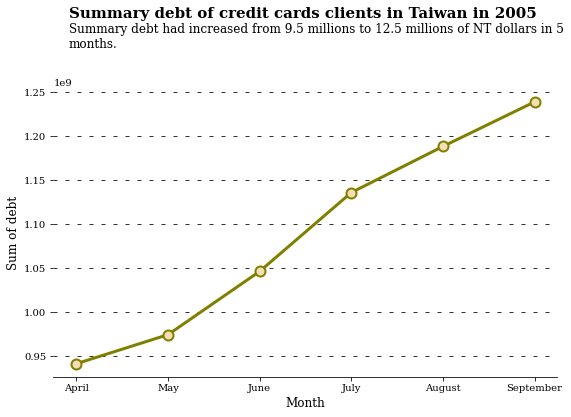

In [17]:
x = debt_by_month['month']
y = debt_by_month['sum']

fig = plt.figure(figsize = (7,4))
plt.rcParams['font.family'] = 'serif'

axes = fig.add_axes([0,0,1,1])
axes.plot(x,y,
         color='olive',
          linewidth=3,
          marker='o',
          markersize=10,
          markerfacecolor='wheat',
          markeredgewidth=2)
axes.set_xlabel('Month',fontsize=12)
axes.set_ylabel('Sum of debt', fontsize=12)
axes.grid(color='black', linestyle=':', axis='y', zorder=1,  dashes=(5,10))
axes.spines['top'].set_visible(False)
axes.spines['right'].set_visible(False)
axes.spines['left'].set_visible(False)
axes.set_title('Summary debt of credit cards clients in Taiwan in 2005 \n\n\n\n', fontsize=15,fontweight='bold')
axes.text(-0.08,1300000000.0,'Summary debt had increased from 9.5 millions to 12.5 millions of NT dollars in 5\nmonths.',fontsize=12,fontweight='light')

plt.show()

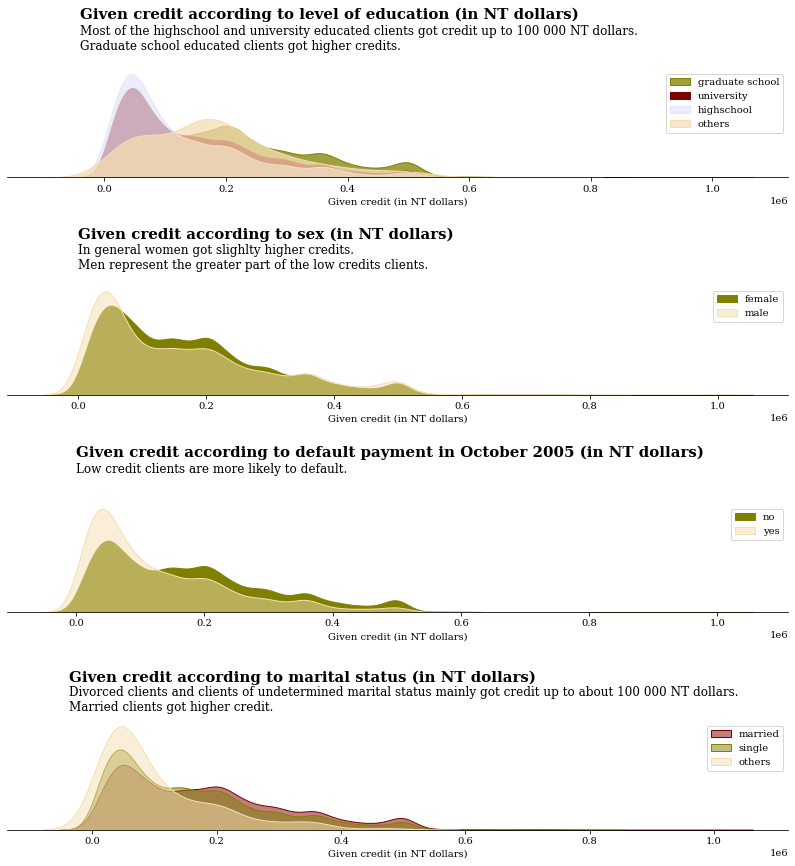

In [18]:
fig=plt.figure(figsize=(14,14),facecolor='white')

ax=[None for i in range(4)]
gs=fig.add_gridspec(4,1)
gs.update(wspace=0, hspace=1)


ax[0]=fig.add_subplot(gs[0,0])
ax[1]=fig.add_subplot(gs[1,0])
ax[2]=fig.add_subplot(gs[2,0])
ax[3]=fig.add_subplot(gs[3,0])

ax[0].text(-40000,0.00001,'Given credit according to level of education (in NT dollars)',fontsize=15,fontweight='bold')
ax[0].text(-40000,0.000008,'Most of the highschool and university educated clients got credit up to 100 000 NT dollars.\nGraduate school educated clients got higher credits.',fontsize=12,fontweight='light')
ax[1].text(0,0.0000078,'Given credit according to sex (in NT dollars)',fontsize=15,fontweight='bold')
ax[1].text(0,0.0000063,'In general women got slighlty higher credits.\nMen represent the greater part of the low credits clients.',fontsize=12,fontweight='light')
ax[2].text(0,0.0000095,'Given credit according to default payment in October 2005 (in NT dollars)',fontsize=15,fontweight='bold')
ax[2].text(0,0.0000076,'Low credit clients are more likely to default.\n',fontsize=12,fontweight='light')
ax[3].text(-38000,0.0000095,'Given credit according to marital status (in NT dollars)',fontsize=15,fontweight='bold')
ax[3].text(-38000,0.0000076,'Divorced clients and clients of undetermined marital status mainly got credit up to about 100 000 NT dollars.\nMarried clients got higher credit.',fontsize=12,fontweight='light')



sns.kdeplot(data=credit[credit.EDUCATION==1],x='LIMIT_BAL',ax=ax[0],shade=True,color='olive',alpha=0.75, label='graduate school')
sns.kdeplot(data=credit[credit.EDUCATION==2],x='LIMIT_BAL',ax=ax[0],shade=True,color='Maroon',alpha=1, label='university')
sns.kdeplot(data=credit[credit.EDUCATION==3],x='LIMIT_BAL',ax=ax[0],shade=True,color='Lavender',alpha=0.75, label='highschool')
sns.kdeplot(data=credit[credit.EDUCATION==4],x='LIMIT_BAL',ax=ax[0],shade=True,color='wheat',alpha=0.75, label='others')
ax[0].legend()

sns.kdeplot(data=credit[credit.SEX==2],x='LIMIT_BAL',ax=ax[1],shade=True,color='olive',alpha=1, label='female')
sns.kdeplot(data=credit[credit.SEX==1],x='LIMIT_BAL',ax=ax[1],shade=True,color='wheat',alpha=0.5, label='male')
ax[1].legend()

sns.kdeplot(data=credit[credit['default payment next month']==0],x='LIMIT_BAL',ax=ax[2],shade=True,color='olive',alpha=1, label='no')
sns.kdeplot(data=credit[credit['default payment next month']==1],x='LIMIT_BAL',ax=ax[2],shade=True,color='wheat',alpha=0.5, label='yes')
ax[2].legend()

sns.kdeplot(data=credit[credit['MARRIAGE']==1],x='LIMIT_BAL',ax=ax[3],shade=True,color='Maroon',alpha=0.5, label='married')
sns.kdeplot(data=credit[credit['MARRIAGE']==2],x='LIMIT_BAL',ax=ax[3],shade=True,color='olive',alpha=0.5, label='single')
sns.kdeplot(data=credit[credit['MARRIAGE']==3],x='LIMIT_BAL',ax=ax[3],shade=True,color='wheat',alpha=0.5, label='others')
ax[3].legend()


for i in range(4):
    ax[i].set_xlabel('Given credit (in NT dollars)')
    ax[i].set_yticklabels('')
    ax[i].set_ylabel('')    
    ax[i].tick_params(axis='y',length=0)
    
    for direction in ['top','right','left']:
        ax[i].spines[direction].set_visible(False)

In [19]:
# adding mean_payment_delay attribute

def count_mean_payment_delay(row):
    payments = row[['PAY_0','PAY_2','PAY_3', 'PAY_4', 'PAY_5', 'PAY_6']]
    payments_delay = []
    for payment in payments:
        if payment > 0:
            payments_delay.append(payment)
        return sum(payments_delay)/6
credit['mean_payment_delay'] = credit.apply(lambda row: count_mean_payment_delay(row),axis=1)

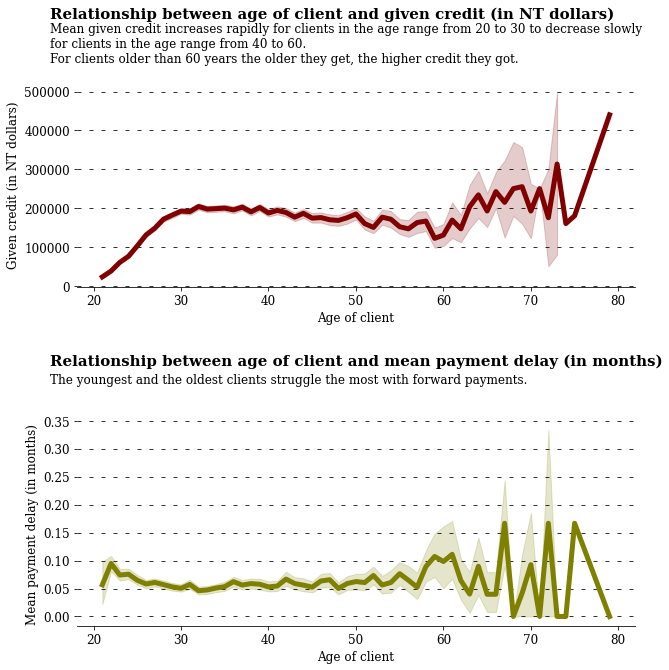

In [20]:
fig=plt.figure(figsize=(10,10),facecolor='white')

gs=fig.add_gridspec(2,1)
gs.update(wspace=0, hspace=0.65)

ax[0]=fig.add_subplot(gs[0,0])
ax[1]=fig.add_subplot(gs[1,0])

ax[0].text(15,690000,'Relationship between age of client and given credit (in NT dollars)',fontsize=15,fontweight='bold')
ax[0].text(15,575000,'Mean given credit increases rapidly for clients in the age range from 20 to 30 to decrease slowly\nfor clients in the age range from 40 to 60.\nFor clients older than 60 years the older they get, the higher credit they got.',fontsize=12,fontweight='light')
ax[1].text(15,0.45,'Relationship between age of client and mean payment delay (in months)',fontsize=15,fontweight='bold')
ax[1].text(15,0.39,'The youngest and the oldest clients struggle the most with forward payments.\n',fontsize=12,fontweight='light')



sns.lineplot(data=credit,x='AGE',y='LIMIT_BAL',ax=ax[0],color='Maroon',linewidth=5)
ax[0].set_ylabel('Given credit (in NT dollars)', fontsize=12)
ax[0].set_xlabel('Age of client', fontsize=12)

sns.lineplot(data=credit,x='AGE',y='mean_payment_delay',ax=ax[1],color='olive',linewidth=5)
ax[1].set_ylabel('Mean payment delay (in months)', fontsize=12)
ax[1].set_xlabel('Age of client', fontsize=12)

for i in range(2):
    ax[i].tick_params(axis='both', which='major', labelsize=12)
    
    ax[i].grid(color='black', linestyle=':', axis='y', zorder=1,  dashes=(5,10))
    for direction in ['top','right','left']:
        ax[i].spines[direction].set_visible(False)
        
plt.tight_layout()
plt.show()

In [21]:
# data preparation for visualisation

# by sex
by_sex = credit[['SEX','default payment next month']].groupby('SEX').sum().reset_index()
by_sex.at[0,'SEX']='male'
by_sex.at[1,'SEX']='female'

cred_by_sex = credit["SEX"].value_counts().to_frame().reset_index()
cred_by_sex.at[0,'index']='male'
cred_by_sex.at[1,'index']='female'

# by education
by_education = credit[['EDUCATION','default payment next month']].groupby('EDUCATION').sum().reset_index()
by_education.at[0,'EDUCATION']='graduate school'
by_education.at[1,'EDUCATION']='university'
by_education.at[2,'EDUCATION']='high school'
by_education.at[3,'EDUCATION']='others'

cred_by_edu = credit["EDUCATION"].value_counts().to_frame().reset_index()
cred_by_edu.at[0,'index']='graduate school'
cred_by_edu.at[1,'index']='university'
cred_by_edu.at[2,'index']='high school'
cred_by_edu.at[3,'index']='others'

# by marriage
by_marriage = credit[['MARRIAGE','default payment next month']].groupby('MARRIAGE').sum().reset_index()
by_marriage.at[0,'MARRIAGE']='married'
by_marriage.at[1,'MARRIAGE']='single'
by_marriage.at[2,'MARRIAGE']='others'

cred_by_mar = credit["MARRIAGE"].value_counts().to_frame().reset_index()
cred_by_mar.at[0,'index']='married'
cred_by_mar.at[1,'index']='single'
cred_by_mar.at[2,'index']='others'

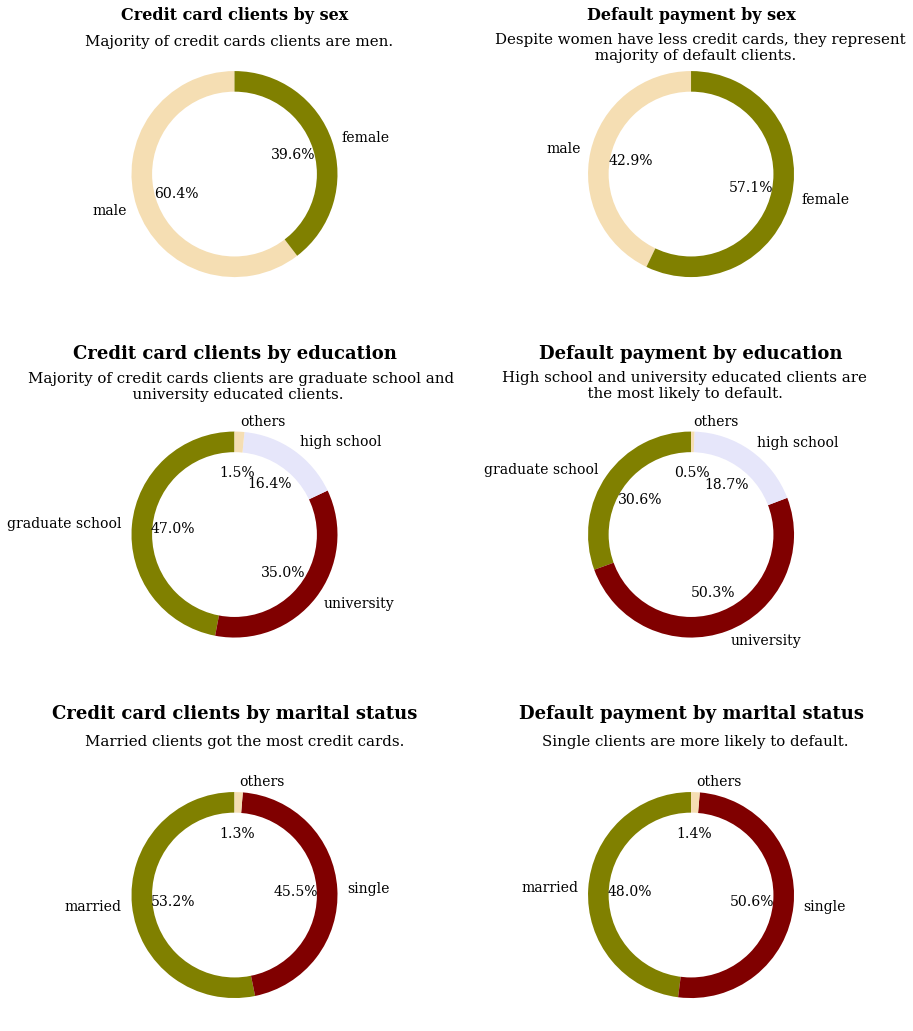

In [22]:
fig=plt.figure(figsize=(15,18),facecolor='white')
gs=fig.add_gridspec(3,2)
gs.update( hspace=0.4)

ax0=fig.add_subplot(gs[0,0])
ax1=fig.add_subplot(gs[0,1])
ax2=fig.add_subplot(gs[1,0])
ax3=fig.add_subplot(gs[1,1])
ax4=fig.add_subplot(gs[2,0])
ax5=fig.add_subplot(gs[2,1])


colormap1=['wheat','olive']
colormap2=['olive','Maroon','Lavender','wheat']
colormap3=['olive','Maroon','wheat']



ax0.pie(cred_by_sex['SEX'], autopct='%1.1f%%',startangle=90,colors=colormap1,labels=cred_by_sex['index'],textprops={'fontsize': 14})
centre_circle = plt.Circle((0,0),0.80,fc='white')
ax0.add_artist(centre_circle)
ax0.set_title('Credit card clients by sex\n', fontsize=16,fontweight='bold')
ax0.text(-1.45,1.25,'Majority of credit cards clients are men.',fontsize=15)

ax1.pie(by_sex['default payment next month'], autopct='%1.1f%%',startangle=90,colors=colormap1,labels=by_sex.SEX,textprops={'fontsize': 14})
centre_circle = plt.Circle((0,0),0.80,fc='white')
ax1.add_artist(centre_circle)
ax1.set_title('Default payment by sex\n', fontsize=16,fontweight='bold')
ax1.text(-1.9,1.11,'Despite women have less credit cards, they represent\n\
                     majority of default clients.',fontsize=15)

ax2.pie(cred_by_edu['EDUCATION'], autopct='%1.1f%%',startangle=90,colors=colormap2,labels=cred_by_edu['index'],textprops={'fontsize': 14})
centre_circle = plt.Circle((0,0),0.80,fc='white')
ax2.add_artist(centre_circle)
ax2.set_title('Credit card clients by education\n\n', fontsize=18,fontweight='bold')
ax2.text(-2,1.32,'Majority of credit cards clients are graduate school and\n\
                      university educated clients.',fontsize=15)

ax3.pie(by_education['default payment next month'], autopct='%1.1f%%', startangle=90,colors=colormap2,labels=by_education.EDUCATION,textprops={'fontsize': 14})
centre_circle = plt.Circle((0,0),0.80,fc='white')
ax3.add_artist(centre_circle)
ax3.set_title('Default payment by education\n\n', fontsize=18,fontweight='bold')
ax2.text(2.6,1.33,'High school and university educated clients are\n\
                  the most likely to default.',fontsize=15)

ax4.pie(cred_by_mar['MARRIAGE'], autopct='%1.1f%%', startangle=90,colors=colormap3,labels=cred_by_mar['index'],textprops={'fontsize': 14})
centre_circle = plt.Circle((0,0),0.80,fc='white')
ax4.add_artist(centre_circle)
ax4.set_title('Credit card clients by marital status\n\n', fontsize=18,fontweight='bold')
ax4.text(-1.45,1.45,'Married clients got the most credit cards.',fontsize=15)

ax5.pie(by_marriage['default payment next month'], autopct='%1.1f%%', startangle=90,colors=colormap3,labels=by_marriage.MARRIAGE,textprops={'fontsize': 14})
centre_circle = plt.Circle((0,0),0.80,fc='white')
ax5.add_artist(centre_circle)
ax5.set_title('Default payment by marital status\n\n', fontsize=18,fontweight='bold')
ax5.text(-1.45,1.45,'Single clients are more likely to default.',fontsize=15)

plt.tight_layout()
plt.show()

# Feature Engineering

***
**Looking for correlations**
***

In [23]:
credit = strat_train_set.copy()

In [24]:
credit.columns

Index(['LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_0', 'PAY_2',
       'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6',
       'default payment next month'],
      dtype='object')

**Correlations between numeric features and `default payment next month`**

In [25]:
features = ['LIMIT_BAL', 'AGE', 'PAY_0', 'PAY_2',
       'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6']

from scipy import stats

corr_dict = {}
for col in features:
    corr_dict[col] = stats.pointbiserialr(credit[col], credit['default payment next month'])[0]
pd.Series(corr_dict).sort_values(ascending=False)

PAY_0        0.398049
PAY_2        0.326009
PAY_3        0.288920
PAY_4        0.269944
PAY_5        0.258775
PAY_6        0.244219
AGE          0.011754
BILL_AMT6   -0.005035
BILL_AMT5   -0.005291
BILL_AMT4   -0.009895
BILL_AMT2   -0.013276
BILL_AMT3   -0.013786
BILL_AMT1   -0.019719
PAY_AMT3    -0.052198
PAY_AMT6    -0.054429
PAY_AMT5    -0.056409
PAY_AMT4    -0.056930
PAY_AMT2    -0.057740
PAY_AMT1    -0.068543
LIMIT_BAL   -0.153002
dtype: float64

**`PAY_0 - PAY_6` attributes are the most correlated to `default payment next month` attribute. `LIMIT_BAL` is negatively correlated to `default payment next month` attribute.**

***
**Experimenting with attribute combinations**
***

**`mean_payment_delay` attribute was created to check correlation between mean payment delay for each client with `default payment next month` attribute.**

In [26]:
def count_mean_payment_delay(row):
    payments = row[['PAY_0','PAY_2','PAY_3', 'PAY_4', 'PAY_5', 'PAY_6']]
    payments_delay = []
    for payment in payments:
        if payment > 0:
            payments_delay.append(payment)
        return sum(payments_delay)/6

credit['mean_payment_delay'] = credit.apply(lambda row: count_mean_payment_delay(row),axis=1)

In [27]:
stats.pointbiserialr(credit['mean_payment_delay'], credit['default payment next month'])[0]

0.3980494748436109

**`mean_payment_delay` attribute is correlated the same as `PAY_0` attribiute to `default payment next month` attribute. It will be used during modeling.** 

**There were also created `mean_BILL_AMT` and `mean_PAY_AMT` atributes.**

In [28]:
credit['mean_BILL_AMT'] = (credit['BILL_AMT6'] + credit['BILL_AMT5'] + credit['BILL_AMT4'] + credit['BILL_AMT3'] + credit['BILL_AMT2'] + credit['BILL_AMT1'])/6
credit['mean_PAY_AMT'] = (credit['PAY_AMT1'] + credit['PAY_AMT2'] + credit['PAY_AMT3'] + credit['PAY_AMT4'] + credit['PAY_AMT5'] + credit['PAY_AMT6'])/6

In [29]:
stats.pointbiserialr(credit['mean_BILL_AMT'], credit['default payment next month'])[0]

-0.012150500385858649

**`mean_BILL_AMT` attribute has little bit higher negative correlation to `default payment next month` attribute than some of the `BILL_AMT` attributes for specific months. It will be used during modeling.**

In [30]:
stats.pointbiserialr(credit['mean_PAY_AMT'], credit['default payment next month'])[0]

-0.10018667274003304

**`mean_PAY_AMT` attribute has higher negative correlation to `default payment next month` attribute than any of the `PAY_AMT` attributes for specific months. It will be used during modeling.**

**Correlations beetween features**

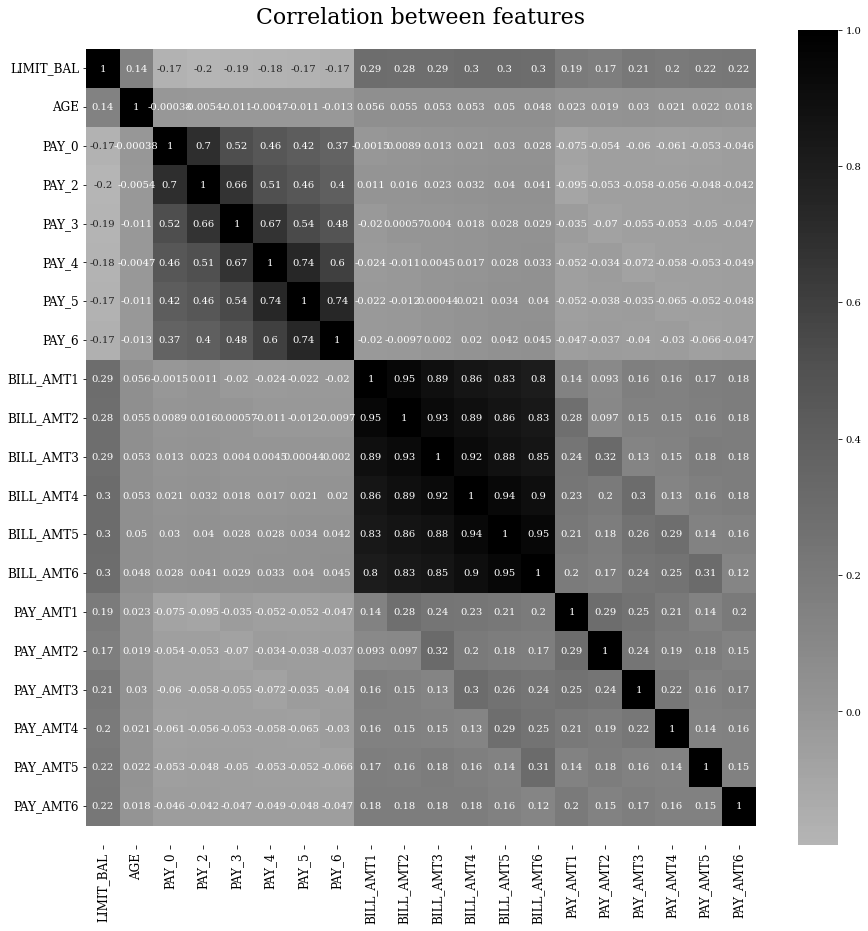

In [31]:
plt.figure(figsize=(15, 15))
ax = sns.heatmap(credit[features].corr(),
                 xticklabels=credit[features].corr().columns,
                 yticklabels=credit[features].columns,
                 cmap="Greys",
                 center=0,
                 annot=True)

plt.title('Correlation between features', fontsize=22)
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

**There are some correlations between features, especially between `BILL_AMT` and `PAY_AMT` attributes for specific months. Uncorrelated data are potentially more useful. Correlated and uncorrelated data was separately fit via linear regression to show how correlation affects distinction between default and non default clients in linear model.**

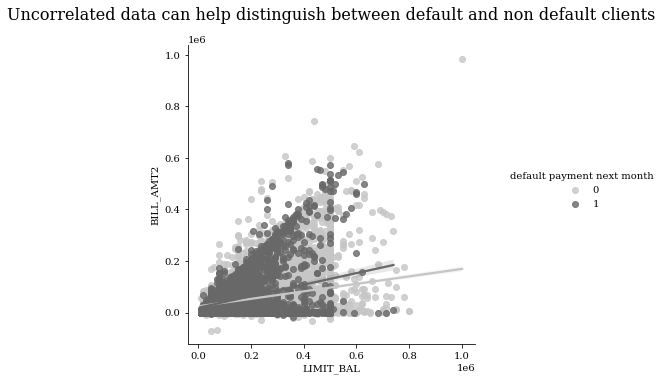

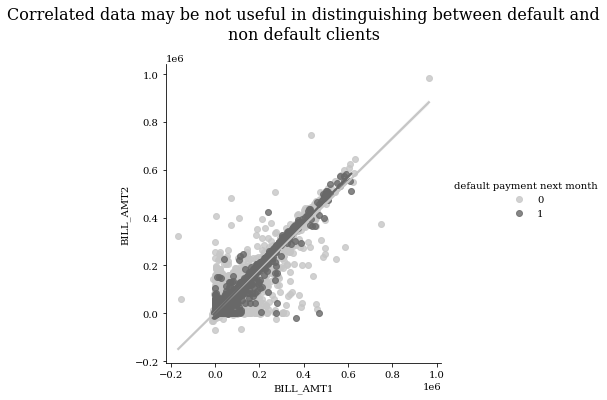

In [32]:
sns.lmplot(x='LIMIT_BAL', y= 'BILL_AMT2', data = credit, hue ='default payment next month', 
           palette='Greys')
plt.title('Uncorrelated data can help distinguish between default and non default clients\n', size=16)


sns.lmplot(x='BILL_AMT1', y= 'BILL_AMT2', data = credit, hue ='default payment next month', 
           palette='Greys')
plt.title('Correlated data may be not useful in distinguishing between default and\nnon default clients\n', size=16);


# Feature Selection for Logistic Regression

In [33]:
credit_attr = credit.drop('default payment next month', axis=1)
credit_labels = credit['default payment next month']
scaler = StandardScaler()
scaled_credit_attr = scaler.fit_transform(credit_attr)

**Feature ranking with recursive feature elimination**

In [34]:
X = scaled_credit_attr
y = credit_labels
model = LogisticRegression()
rfe_stand = RFE(model, n_features_to_select=10)
fit_stand = rfe_stand.fit(X,y)
print("Feature Ranking:", fit_stand.ranking_)
# calculate the score for the selected features
score_stand = rfe_stand.score(X,y)
print("Standardized Model Score with selected features is: %f (%f)" % (score_stand.mean(), score_stand.std()))

Feature Ranking: [ 1  8  9  4 10  1 14  1  7  2  1  1  1  3  6 15 16  1  1  5 12 11 13  1
 17  1]
Standardized Model Score with selected features is: 0.818625 (0.000000)


In [35]:
feature_names = np.array(credit_attr.columns)
print('Most important features (RFE): %s'% feature_names[rfe_stand.support_])

Most important features (RFE): ['LIMIT_BAL' 'PAY_0' 'PAY_3' 'PAY_6' 'BILL_AMT1' 'BILL_AMT2' 'PAY_AMT1'
 'PAY_AMT2' 'mean_payment_delay' 'mean_PAY_AMT']


**Despite what was shown earlier correlated features were also chosen as the most important.**

Datasets preparation for Logistic Regression model with the most important features (it was trained different than other models)

In [36]:
credit_train_most_important = credit[['LIMIT_BAL', 'PAY_0' ,'PAY_3' ,'PAY_6', 'BILL_AMT1' ,'BILL_AMT2' ,'PAY_AMT1',
 'PAY_AMT2', 'mean_payment_delay', 'mean_PAY_AMT']]

test_imp = strat_test_set.copy()
test_imp['mean_payment_delay'] = test_imp.apply(lambda row: count_mean_payment_delay(row),axis=1)
test_imp['mean_PAY_AMT'] = (test_imp['PAY_AMT1'] + test_imp['PAY_AMT2'] + test_imp['PAY_AMT3'] + test_imp['PAY_AMT4'] + test_imp['PAY_AMT5'] + test_imp['PAY_AMT6'])/6
credit_test_most_important = test_imp[['LIMIT_BAL', 'PAY_0' ,'PAY_3' ,'PAY_6', 'BILL_AMT1' ,'BILL_AMT2' ,'PAY_AMT1',
 'PAY_AMT2', 'mean_payment_delay', 'mean_PAY_AMT']]

train_labels = credit['default payment next month']
test_labels = test_imp['default payment next month']

# Modeling

*** 
 
**Given dataset is basis for future model establising credit card client credibility. It is not specified how client credibility is established at present. Therefore for use of this project some assumtions were made:**
* **client with default payment this month is found not credible,**
* **bank's profit from one credit is 20% of its value,**
* **bank's loss is 40% of credit value if client turns out insolvent,**
* **since low credits are majority of credits median of `BILL_AMT1` was chosen as refernce value of credit (22 594 NT dollars).**
***

***
**Data preparation for ML algorithms**
***

In [37]:
# adding new attributes

class MeanAttributesAdder(BaseEstimator, TransformerMixin):
    def __init__(self, add_mean_payment_delay=True, add_mean_bill_amt=True, add_mean_pay_amt=True):
        self.add_mean_payment_delay = add_mean_payment_delay
        self.add_mean_bill_amt = add_mean_bill_amt
        self.add_mean_pay_amt = add_mean_pay_amt
    def fit(self, X, y=None):
        return self
    def transform(self, X):
        # add mean payment delay
        if self.add_mean_payment_delay:
            def count_mean_payment_delay(row):
                payments = row[['PAY_0','PAY_2','PAY_3', 'PAY_4', 'PAY_5', 'PAY_6']]
                payments_delay = []
                for payment in payments:
                    if payment > 0:
                        payments_delay.append(payment)
                return sum(payments_delay)/6
            X['mean_payment_delay'] = df.apply(lambda row: count_mean_payment_delay(row),axis=1)
        if self.add_mean_bill_amt:
            X['mean_bill_amty_amt'] = (X['BILL_AMT6'] + X['BILL_AMT5'] + X['BILL_AMT4'] + X['BILL_AMT3'] + X['BILL_AMT2'] + X['BILL_AMT1'])/6
        if self.add_mean_pay_amt:    
            
            X['mean_pay_amt'] = (X['PAY_AMT1'] + X['PAY_AMT2'] + X['PAY_AMT3'] + X['PAY_AMT4'] + X['PAY_AMT5'] + X['PAY_AMT6'])/6
        
        return X

In [38]:
# categorical attributes cleaning

class CategoricalFeaturesCleaner(BaseEstimator, TransformerMixin):
    def __init__(self):
        self=self
        
    def fit(self, X, y=None):
        return self
    
    def transform(self, X):
        X.loc[~X['EDUCATION'].isin([1, 2, 3]), 'EDUCATION'] = 4
        X.loc[~X['MARRIAGE'].isin([1, 2]), 'MARRIAGE'] = 3
           
        return X

In [39]:
# transforming PAY_X attributes to numeric attributes

class PayCleaner(BaseEstimator, TransformerMixin):
    def __init__(self):
        self=self
        
    def fit(self, X, y=None):
        return self
    
    def transform(self, X):
        pay_x = ['PAY_0', 'PAY_2','PAY_3','PAY_4','PAY_5','PAY_6']

        for x in pay_x:
            X.loc[~X[x].isin([1, 2,3,4,5,6,7,8]), x] = 0    
           
        return X

**Function for models evaluation**

In [40]:
metrics_dataframe = pd.DataFrame(columns=['Model', 'F1_score', 'AUC'])
metrics_dataframe
models = []
models_names = []
predictions_proba_list = []

def calculate_metrics (model, name, X_checked, y_checked):
    models.append(model)
    models_names.append(name)
    global metrics_dataframe
    predictions = model.predict(X_checked)
    predictions_proba = model.predict_proba(X_checked)
    predictions_proba_list.append(predictions_proba[:,1])
    
    
    # Precision, Recall, Accuracy
    print(classification_report(y_checked,predictions))
    
    # Confusion Matrix
    plt.figure()
    cm = confusion_matrix(y_checked,predictions)
    ax = sns.heatmap(cm, annot=True, cmap='Greys', fmt='.0f')
    ax.set_title('Confusion Matrix\n\n')
    ax.set_xlabel('\nPredicted Values')
    ax.set_ylabel('Actual Values')
    plt.show()
    
    # plot ROC curve
    fig = plt.figure(figsize=(6,6))
    plt.plot([0,1],[0,1],'k--')
    for model_selected, name_selected, pred_proba in zip(models,models_names,predictions_proba_list):
        fpr,tpr,threshold = roc_curve(y_checked,pred_proba)
        plt.plot(fpr,tpr,label=name_selected)
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curve')
    plt.legend(loc='lower right')
    plt.show()
    
    f1_metric = f1_score(y_checked, predictions)
    auc_metric = roc_auc_score(y_checked, predictions_proba[:,1])
    metrics_dataframe = metrics_dataframe.append({'Model':name,'F1_score': f1_metric, 'AUC' : auc_metric}, ignore_index=True)
    
    return metrics_dataframe


# Logisic Regression model with the most important features

In [41]:
features = ['LIMIT_BAL', 'PAY_0' ,'PAY_3' ,'PAY_6', 'BILL_AMT1' ,'BILL_AMT2' ,'PAY_AMT1',
 'PAY_AMT2', 'mean_payment_delay', 'mean_PAY_AMT']



class PayCleanerImp(BaseEstimator, TransformerMixin):
    def __init__(self):
        self=self
        
    def fit(self, X, y=None):
        return self
    
    def transform(self, X):
        pay_x = ['PAY_0','PAY_6','PAY_3']

        for x in pay_x:
            X.loc[~X[x].isin([1, 2,3,4,5,6,7,8]), x] = 0    
           
        return X

num_pipeline = Pipeline([
    ('pay', PayCleanerImp()),
    ('standard_scaler', StandardScaler())
])


data_preparation = ColumnTransformer([
    
    ('num', num_pipeline, features )
])


model_pipeline_lr_1 = Pipeline(steps=[('preprocessor', data_preparation),
                                ('lr', LogisticRegression(solver='saga'))
                                    ])

params = {
    'lr__penalty': ['l1', 'l2', 'elasticnet', 'none'],
    'lr__C': [0.5,1,2]
    
}

grid_search = GridSearchCV(model_pipeline_lr_1, params, cv=5, n_jobs=-1, verbose=10, scoring='f1_macro')
grid_search.fit(credit_train_most_important, train_labels)
print('Wybrane hiperparametry: ', grid_search.best_params_)
model_lr_1 = grid_search.best_estimator_

Fitting 5 folds for each of 12 candidates, totalling 60 fits
Wybrane hiperparametry:  {'lr__C': 0.5, 'lr__penalty': 'l1'}


              precision    recall  f1-score   support

           0       0.84      0.95      0.89      4673
           1       0.68      0.35      0.46      1327

    accuracy                           0.82      6000
   macro avg       0.76      0.65      0.67      6000
weighted avg       0.80      0.82      0.80      6000



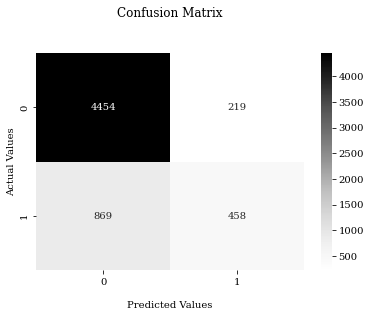

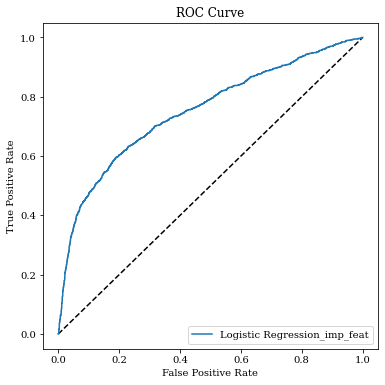

,Model,F1_score,AUC
0,Logistic Regression_imp_feat,0.457086,0.752192


In [42]:
calculate_metrics(model_lr_1, 'Logistic Regression_imp_feat', credit_test_most_important, test_labels)

***
**Datasets preparation for other ML algorithms**
***

In [43]:
# numeric and categorical features separation
credit = strat_train_set.copy()
credit_num = credit.drop(['EDUCATION','SEX', 'MARRIAGE', 'default payment next month'], axis=1)
numeric_features = list(credit_num)
categorical_features = ['EDUCATION','SEX', 'MARRIAGE']

# labels separation
train_set = credit.drop('default payment next month', axis=1)
train_labels = credit['default payment next month']

print('Train set shape: ', train_set.shape)
print('Train labels shape: ', train_labels.shape)

test = strat_test_set.copy()
test_set = test.drop('default payment next month', axis=1)
test_labels = test['default payment next month']

print('\nTest set shape: ', test_set.shape)
print('Test labels shape: ', test_labels.shape)

Train set shape:  (24000, 23)
Train labels shape:  (24000,)

Test set shape:  (6000, 23)
Test labels shape:  (6000,)


# Logistic Regression

In [44]:
num_pipeline = Pipeline([
    ('pay', PayCleaner()),
    ('attributes_adder', MeanAttributesAdder()),
    ('standard_scaler', StandardScaler())
])

cat_pipeline = Pipeline([
    ('cleaning',CategoricalFeaturesCleaner()),
    ('one_hot', OneHotEncoder(sparse=False ,handle_unknown='ignore'))
])

data_preparation = ColumnTransformer([
    
    ('num', num_pipeline, numeric_features),
    ('cat', cat_pipeline, categorical_features)
])


model_pipeline_lr = Pipeline(steps=[('preprocessor', data_preparation),
                                ('lr', LogisticRegression(solver='saga'))
                                    ])

params = {
    'preprocessor__num__attributes_adder__add_mean_bill_amt': [True, False],
    'preprocessor__num__attributes_adder__add_mean_pay_amt': [True, False],
    'preprocessor__num__attributes_adder__add_mean_payment_delay': [True, False],
    'lr__penalty': ['l1', 'l2', 'elasticnet', 'none'],
    'lr__C': [0.5,1,2]
    
}

grid_search = GridSearchCV(model_pipeline_lr, params, cv=5, n_jobs=-1, verbose=10, scoring='f1_macro')
grid_search.fit(train_set, train_labels)
print('Wybrane hiperparametry: ', grid_search.best_params_)
model_lr = grid_search.best_estimator_

Fitting 5 folds for each of 96 candidates, totalling 480 fits
Wybrane hiperparametry:  {'lr__C': 1, 'lr__penalty': 'l1', 'preprocessor__num__attributes_adder__add_mean_bill_amt': False, 'preprocessor__num__attributes_adder__add_mean_pay_amt': True, 'preprocessor__num__attributes_adder__add_mean_payment_delay': False}


              precision    recall  f1-score   support

           0       0.84      0.95      0.89      4673
           1       0.68      0.34      0.45      1327

    accuracy                           0.82      6000
   macro avg       0.76      0.65      0.67      6000
weighted avg       0.80      0.82      0.79      6000



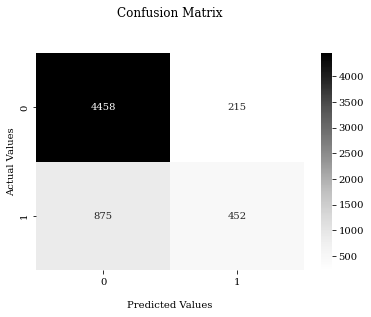

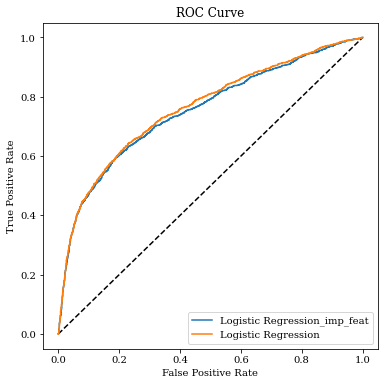

,Model,F1_score,AUC
0,Logistic Regression_imp_feat,0.457086,0.752192
1,Logistic Regression,0.45336,0.76126


In [45]:
calculate_metrics(model_lr, 'Logistic Regression', test_set, test_labels)

**Logistic Regression with GridSearch for the best parameters performed almost the same as Logistic Regression trained only with chosen features.**

# Decision Tree Classifier

In [46]:
num_pipeline = Pipeline([
    ('pay', PayCleaner()),
    ('attributes_adder', MeanAttributesAdder()),
    ('standard_scaler', StandardScaler())
])

cat_pipeline = Pipeline([
    ('cleaning',CategoricalFeaturesCleaner()),
    ('one_hot', OneHotEncoder(sparse=False ,handle_unknown='ignore'))
])

data_preparation = ColumnTransformer([
    
    ('num', num_pipeline, numeric_features),
    ('cat', cat_pipeline, categorical_features)
])


model_pipeline_dtc = Pipeline(steps=[('preprocessor', data_preparation),
                                ('dtc', DecisionTreeClassifier())
                                    ])

params = {
    'preprocessor__num__attributes_adder__add_mean_bill_amt': [True, False],
    'preprocessor__num__attributes_adder__add_mean_pay_amt': [True, False],
    'preprocessor__num__attributes_adder__add_mean_payment_delay': [True, False],
    'dtc__max_depth': [3,5,10,15],
    'dtc__min_samples_leaf': [1,2,3]
    
}

grid_search = GridSearchCV(model_pipeline_dtc, params, cv=5, n_jobs=-1, verbose=10, scoring='f1_macro')
grid_search.fit(train_set, train_labels)
print('Wybrane hiperparametry: ', grid_search.best_params_)
model_dtc = grid_search.best_estimator_

Fitting 5 folds for each of 96 candidates, totalling 480 fits
Wybrane hiperparametry:  {'dtc__max_depth': 3, 'dtc__min_samples_leaf': 1, 'preprocessor__num__attributes_adder__add_mean_bill_amt': True, 'preprocessor__num__attributes_adder__add_mean_pay_amt': True, 'preprocessor__num__attributes_adder__add_mean_payment_delay': False}


              precision    recall  f1-score   support

           0       0.84      0.95      0.89      4673
           1       0.67      0.37      0.48      1327

    accuracy                           0.82      6000
   macro avg       0.76      0.66      0.69      6000
weighted avg       0.80      0.82      0.80      6000



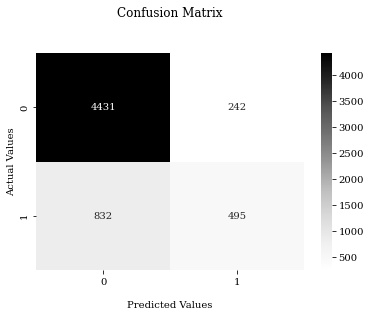

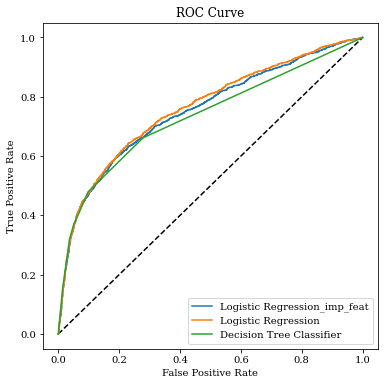

,Model,F1_score,AUC
0,Logistic Regression_imp_feat,0.457086,0.752192
1,Logistic Regression,0.45336,0.76126
2,Decision Tree Classifier,0.479651,0.73365


In [47]:
calculate_metrics(model_dtc, 'Decision Tree Classifier', test_set, test_labels)

# Random Forrest Classifier

In [48]:
num_pipeline = Pipeline([
    ('pay', PayCleaner()),
    ('attributes_adder', MeanAttributesAdder()),
    ('standard_scaler', StandardScaler())
])

cat_pipeline = Pipeline([
    ('cleaning',CategoricalFeaturesCleaner()),
    ('one_hot', OneHotEncoder(sparse=False ,handle_unknown='ignore'))
])

data_preparation = ColumnTransformer([
    
    ('num', num_pipeline, numeric_features),
    ('cat', cat_pipeline, categorical_features)
])


model_pipeline_rfc = Pipeline(steps=[('preprocessor', data_preparation),
                                ('rfc', RandomForestClassifier(n_estimators=1000))
                                    ])

params = {
    'preprocessor__num__attributes_adder__add_mean_bill_amt': [True, False],
    'preprocessor__num__attributes_adder__add_mean_pay_amt': [True, False],
    'preprocessor__num__attributes_adder__add_mean_payment_delay': [True, False],
    'rfc__max_depth': [3,5,10,15],
    'rfc__min_samples_leaf': [1,2,3]
    
}

grid_search = GridSearchCV(model_pipeline_rfc, params, cv=5, n_jobs=-1, verbose=10, scoring='f1_macro')
grid_search.fit(train_set, train_labels)
print('Wybrane hiperparametry: ', grid_search.best_params_)
model_rfc = grid_search.best_estimator_

Fitting 5 folds for each of 96 candidates, totalling 480 fits
Wybrane hiperparametry:  {'preprocessor__num__attributes_adder__add_mean_bill_amt': True, 'preprocessor__num__attributes_adder__add_mean_pay_amt': False, 'preprocessor__num__attributes_adder__add_mean_payment_delay': False, 'rfc__max_depth': 10, 'rfc__min_samples_leaf': 1}


              precision    recall  f1-score   support

           0       0.84      0.95      0.89      4673
           1       0.67      0.36      0.47      1327

    accuracy                           0.82      6000
   macro avg       0.76      0.66      0.68      6000
weighted avg       0.80      0.82      0.80      6000



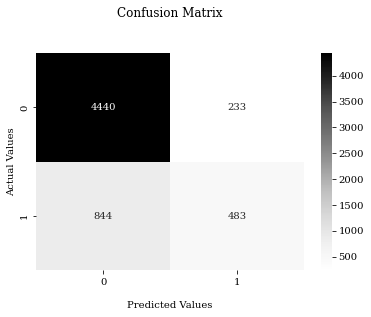

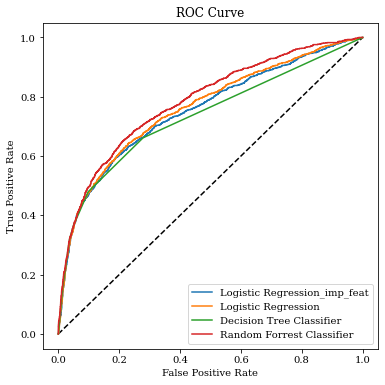

,Model,F1_score,AUC
0,Logistic Regression_imp_feat,0.457086,0.752192
1,Logistic Regression,0.45336,0.76126
2,Decision Tree Classifier,0.479651,0.73365
3,Random Forrest Classifier,0.472834,0.783359


In [49]:
calculate_metrics(model_rfc, 'Random Forrest Classifier', test_set, test_labels)

# KNeighborsClassifier

In [50]:
num_pipeline = Pipeline([
    ('pay', PayCleaner()),
    ('attributes_adder', MeanAttributesAdder()),
    ('standard_scaler', StandardScaler())
])

cat_pipeline = Pipeline([
    ('cleaning',CategoricalFeaturesCleaner()),
    ('one_hot', OneHotEncoder(sparse=False ,handle_unknown='ignore'))
])

data_preparation = ColumnTransformer([
    
    ('num', num_pipeline, numeric_features),
    ('cat', cat_pipeline, categorical_features)
])


model_pipeline_knn = Pipeline(steps=[('preprocessor', data_preparation),
                                ('knn', KNeighborsClassifier())
                                    ])

params = {
    'preprocessor__num__attributes_adder__add_mean_bill_amt': [True, False],
    'preprocessor__num__attributes_adder__add_mean_pay_amt': [True, False],
    'preprocessor__num__attributes_adder__add_mean_payment_delay': [True, False],
    'knn__n_neighbors': [1,3,5,10,15,17,20],
    'knn__weights': ['uniform', 'distance']
    
}

grid_search = GridSearchCV(model_pipeline_knn, params, cv=5, n_jobs=-1, verbose=10, scoring='f1_macro')
grid_search.fit(train_set, train_labels)
print('Wybrane hiperparametry: ', grid_search.best_params_)
model_knn = grid_search.best_estimator_

Fitting 5 folds for each of 112 candidates, totalling 560 fits
Wybrane hiperparametry:  {'knn__n_neighbors': 17, 'knn__weights': 'distance', 'preprocessor__num__attributes_adder__add_mean_bill_amt': False, 'preprocessor__num__attributes_adder__add_mean_pay_amt': True, 'preprocessor__num__attributes_adder__add_mean_payment_delay': False}


              precision    recall  f1-score   support

           0       0.84      0.94      0.88      4673
           1       0.62      0.35      0.45      1327

    accuracy                           0.81      6000
   macro avg       0.73      0.64      0.67      6000
weighted avg       0.79      0.81      0.79      6000



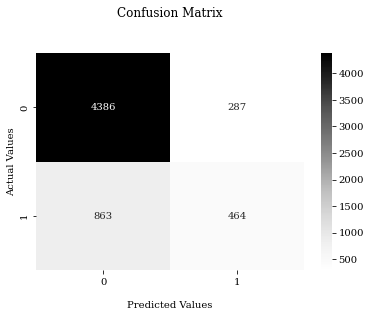

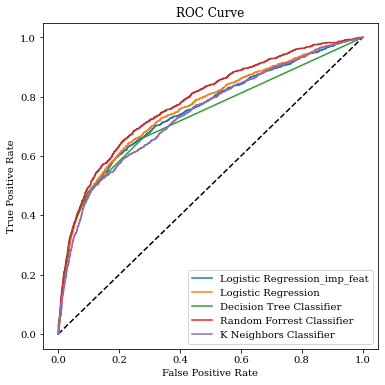

,Model,F1_score,AUC
0,Logistic Regression_imp_feat,0.457086,0.752192
1,Logistic Regression,0.45336,0.76126
2,Decision Tree Classifier,0.479651,0.73365
3,Random Forrest Classifier,0.472834,0.783359
4,K Neighbors Classifier,0.446583,0.742943


In [51]:
calculate_metrics(model_knn, 'K Neighbors Classifier', test_set, test_labels)

# AdaBoost Classifier

In [52]:
num_pipeline = Pipeline([
    ('pay', PayCleaner()),
    ('attributes_adder', MeanAttributesAdder()),
    ('standard_scaler', StandardScaler())
])

cat_pipeline = Pipeline([
    ('cleaning',CategoricalFeaturesCleaner()),
    ('one_hot', OneHotEncoder(sparse=False ,handle_unknown='ignore'))
])

data_preparation = ColumnTransformer([
    
    ('num', num_pipeline, numeric_features),
    ('cat', cat_pipeline, categorical_features)
])


model_pipeline_abc = Pipeline(steps=[('preprocessor', data_preparation),
                                ('abc', AdaBoostClassifier())
                                    ])

params = {
    'preprocessor__num__attributes_adder__add_mean_bill_amt': [True, False],
    'preprocessor__num__attributes_adder__add_mean_pay_amt': [True, False],
    'preprocessor__num__attributes_adder__add_mean_payment_delay': [True, False],
    'abc__base_estimator': [LogisticRegression(penalty = 'l1'),DecisionTreeClassifier(max_depth=1)],
    'abc__n_estimators': [50,70,100]
    
}

grid_search = GridSearchCV(model_pipeline_abc, params, cv=5, n_jobs=-1, verbose=10, scoring='f1_macro')
grid_search.fit(train_set, train_labels)
print('Wybrane hiperparametry: ', grid_search.best_params_)
model_abc = grid_search.best_estimator_

Fitting 5 folds for each of 48 candidates, totalling 240 fits
Wybrane hiperparametry:  {'abc__base_estimator': DecisionTreeClassifier(max_depth=1), 'abc__n_estimators': 100, 'preprocessor__num__attributes_adder__add_mean_bill_amt': False, 'preprocessor__num__attributes_adder__add_mean_pay_amt': True, 'preprocessor__num__attributes_adder__add_mean_payment_delay': False}


              precision    recall  f1-score   support

           0       0.83      0.95      0.89      4673
           1       0.67      0.33      0.44      1327

    accuracy                           0.82      6000
   macro avg       0.75      0.64      0.66      6000
weighted avg       0.80      0.82      0.79      6000



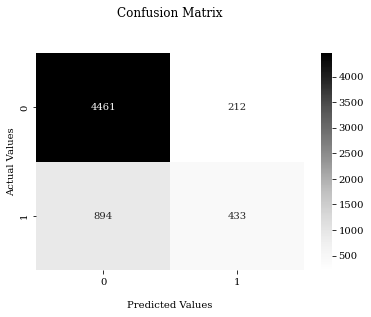

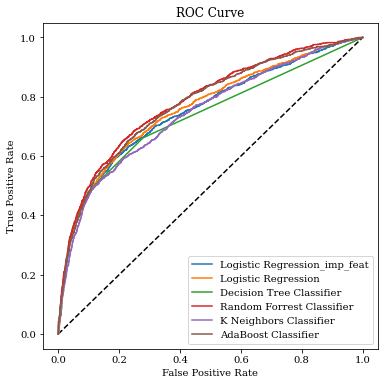

,Model,F1_score,AUC
0,Logistic Regression_imp_feat,0.457086,0.752192
1,Logistic Regression,0.45336,0.76126
2,Decision Tree Classifier,0.479651,0.73365
3,Random Forrest Classifier,0.472834,0.783359
4,K Neighbors Classifier,0.446583,0.742943
5,AdaBoost Classifier,0.439148,0.774886


In [53]:
calculate_metrics(model_abc, 'AdaBoost Classifier', test_set, test_labels)

# Conclusions

**Random Forrest Classifier and AdaBoost Classifier got the best AUC score. However in out estimation it is crucial to look at the recall score for default clients (1). Recall represents correctly classified instances of given class to all instances of given class ratio. In this case every single model got recall score about 0.35 (for default clients). This means that only 35% of default clients were correclty classified. As was assumed before, every client with granted credit, that turns out insolvent, costs bank 40% of given credit. But it is also important to remember that every client, which was incorrectly classified as non credible, causes loss of probable profit, that equals 20% of granted credit.**

**Confusion matrix for Logisitic Regression showed that there were 869 clients incorrectly classified as credible and 219 clients incoreclty classified as non credible. Reference value of credit is 22594 NT dollars. With all assumntions made before, cost of this incorrect classification may be 7 908 250 NT dollars, and loss of probable profit is only 971 585 NT dollars. It means that model can be optimized by increasing recall score (but this will result in precision score decresing and loss of probable profit will increase).**

**But how classification decision is made and how it is possible to affect this decision? 
For each instance classificator computes a score based on decision function. If that score is greater than a threshold, it assigns the instance to the positive class; otherwise it assings it to the negative class. Defaul threshold for Logistic Regression is 0.5. It is possible to influence the recall score by changing the threshold.**

***
**Precision and recall versus the decision threshold**
***

<function matplotlib.pyplot.show(close=None, block=None)>

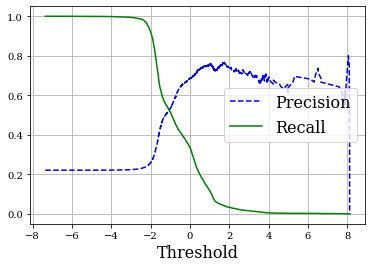

In [68]:
y_scores = cross_val_predict(model_lr, train_set, train_labels, cv=5, method="decision_function")
precisions, recalls, thresholds = precision_recall_curve(train_labels, y_scores)

def plot_precision_recall_vs_threshold(precisions, recalls, thresholds):
    plt.plot(thresholds, precisions[:-1], "b--", label="Precision")
    plt.plot(thresholds, recalls[:-1], "g-", label="Recall")
    plt.legend(loc="center right", fontsize=16)
    plt.xlabel("Threshold", fontsize=16)    
    plt.grid(True)
    

    
plot_precision_recall_vs_threshold(precisions, recalls, thresholds)
plt.show

**The lower threshold, the higher recall.**

In [70]:
# changig the threshold for 0.33
y_pred_new_threshold = (model_lr.predict_proba(test_set)[:,1]>=0.33).astype(int)

In [71]:
print(classification_report(test_labels,y_pred_new_threshold))

              precision    recall  f1-score   support

           0       0.85      0.91      0.88      4673
           1       0.60      0.45      0.52      1327

    accuracy                           0.81      6000
   macro avg       0.73      0.68      0.70      6000
weighted avg       0.80      0.81      0.80      6000



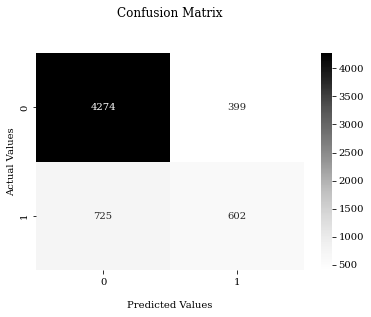

In [73]:
    # Confusion Matrix
    plt.figure()
    cm = confusion_matrix(test_labels,y_pred_new_threshold)
    ax = sns.heatmap(cm, annot=True, cmap='Greys', fmt='.0f')
    ax.set_title('Confusion Matrix\n\n')
    ax.set_xlabel('\nPredicted Values')
    ax.set_ylabel('Actual Values')
    plt.show()

**Changing the threshold to 0.33 resulted at increase of recall score to 0.45. There are 725 clietns incorreclty classified as credible the cost decreased to 6 552 550 NT dollars. There are also 399 clients incorreclty classified as non credible, what can cause loss of probable profit of 1 803 081 NT dollars. It is business decicion if cost or probable loss of profit is more important.**